In [ ]:
!pip install imbalanced-learn

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

**DATA EXPLORATION AND VISUALIZATION**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

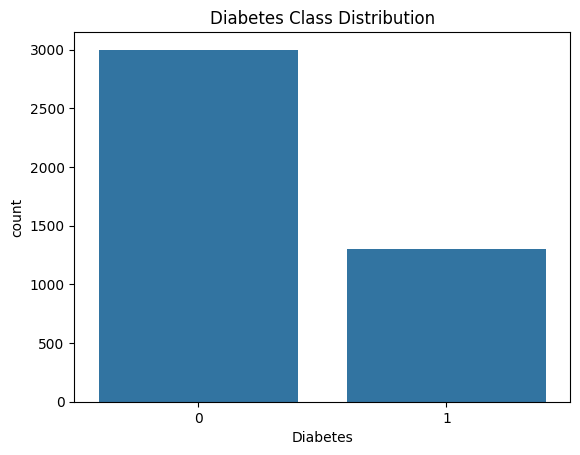

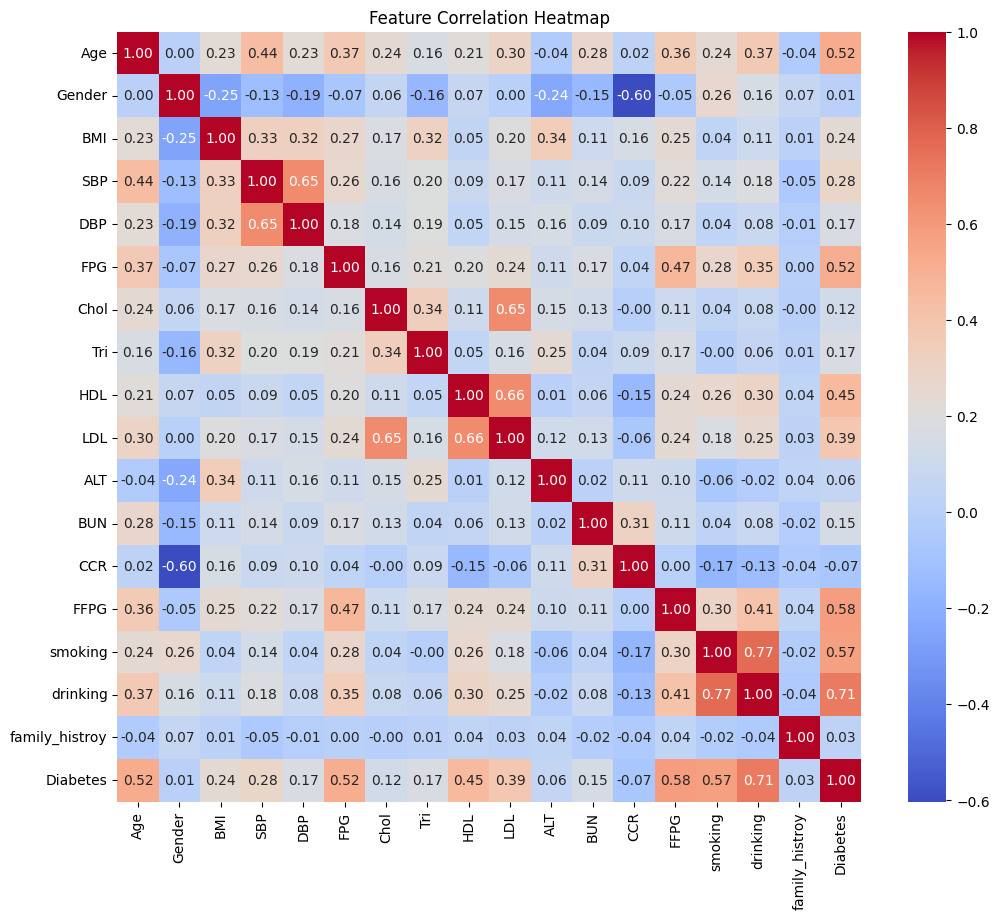

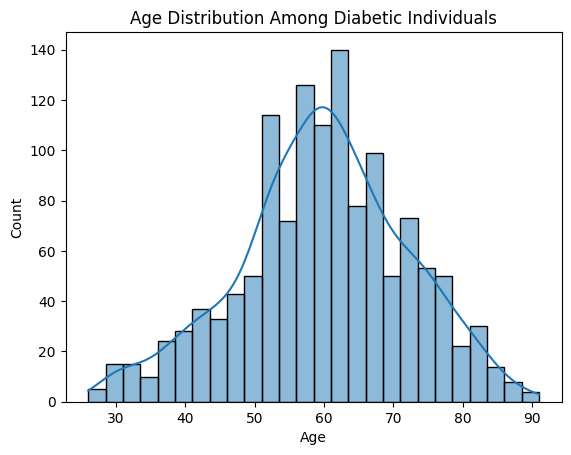

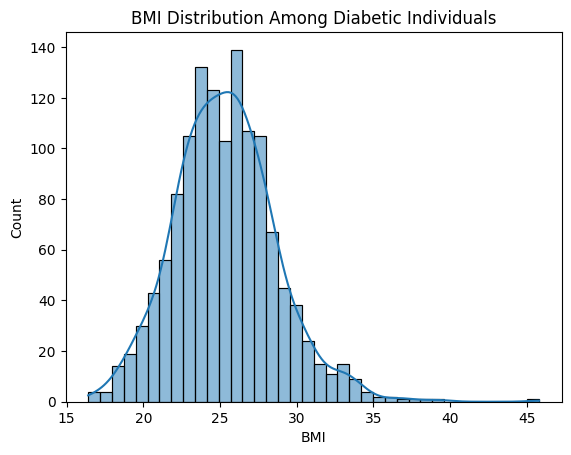

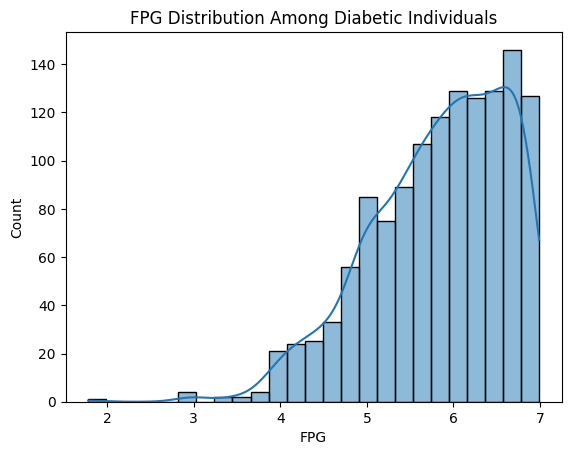

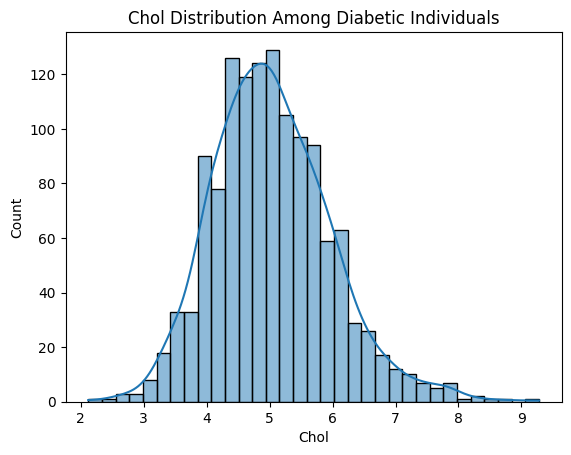

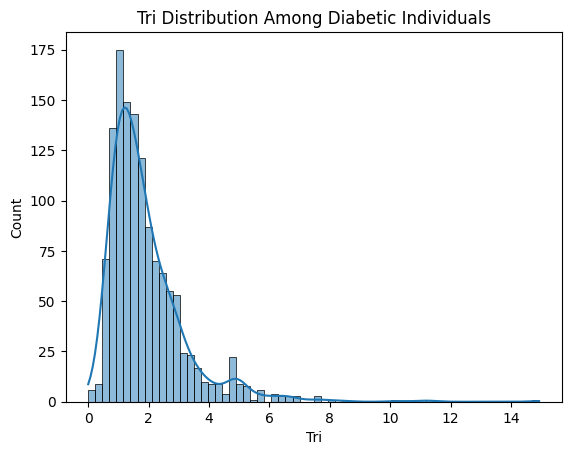

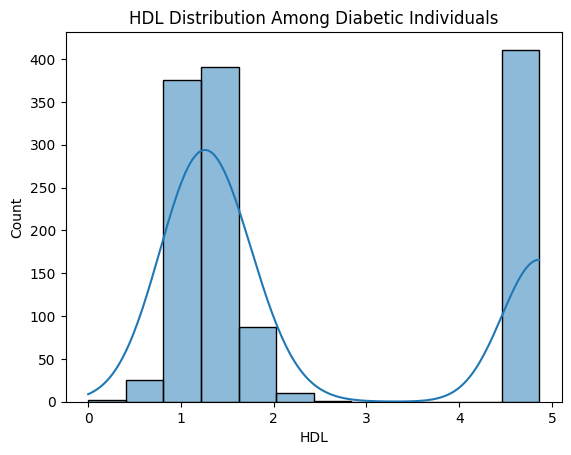

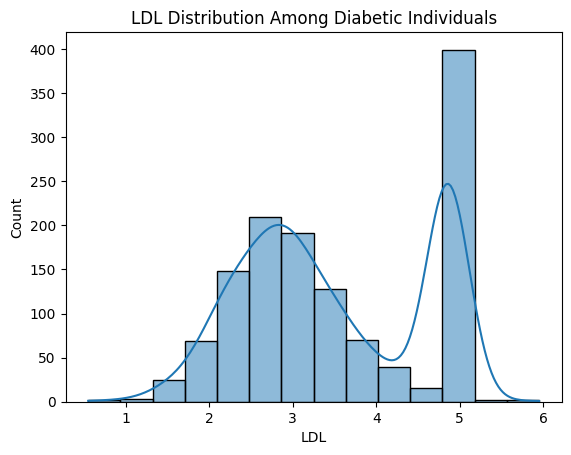

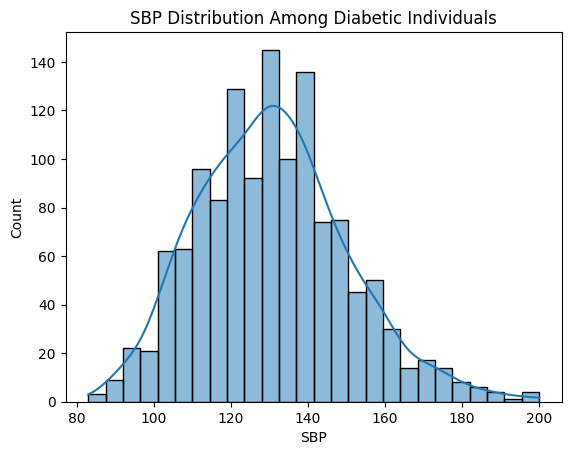

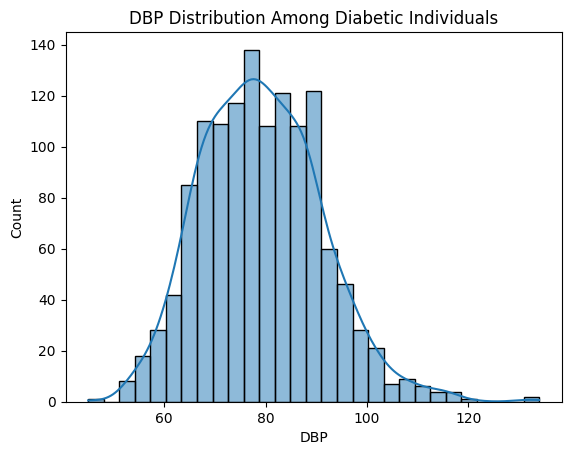

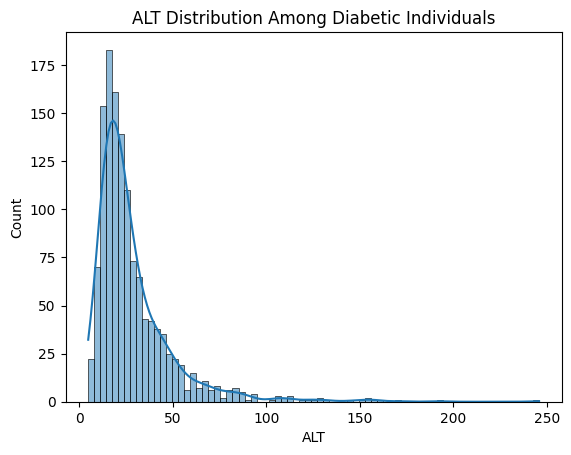

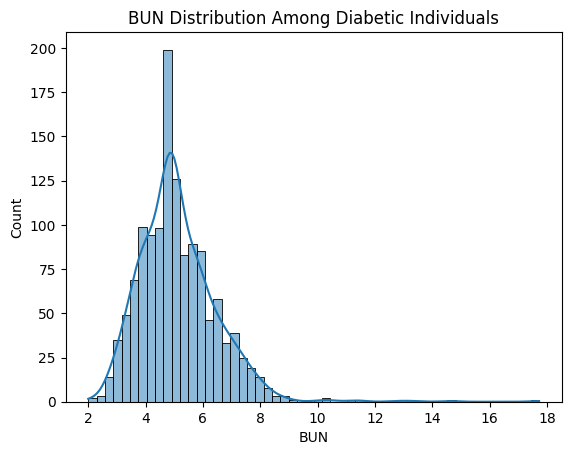

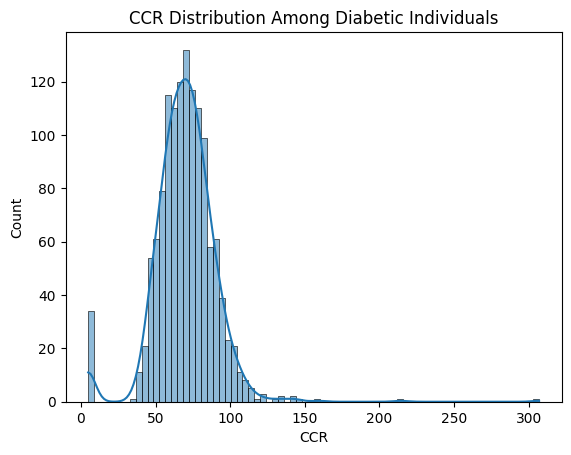

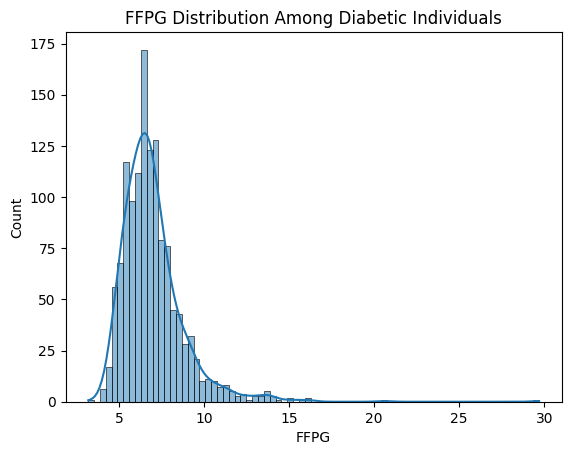

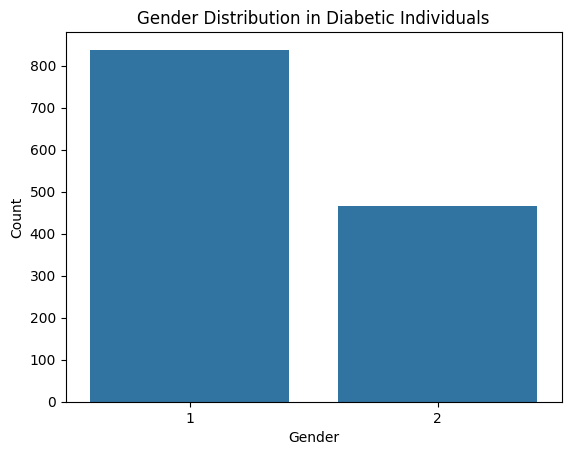

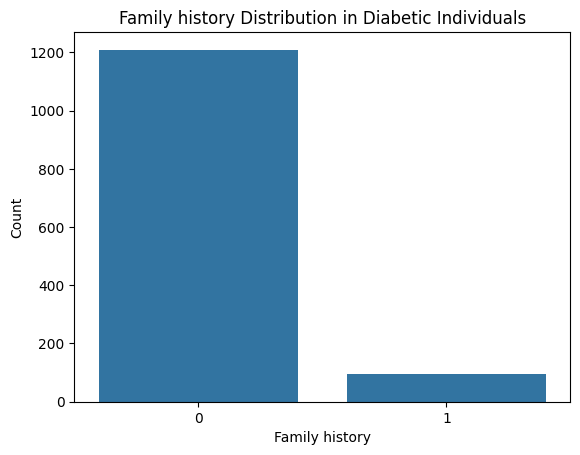

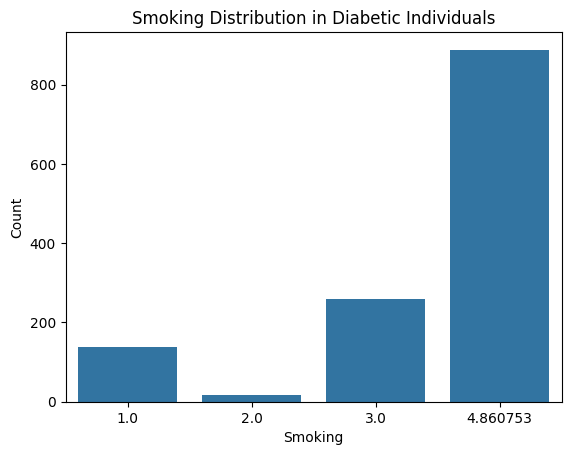

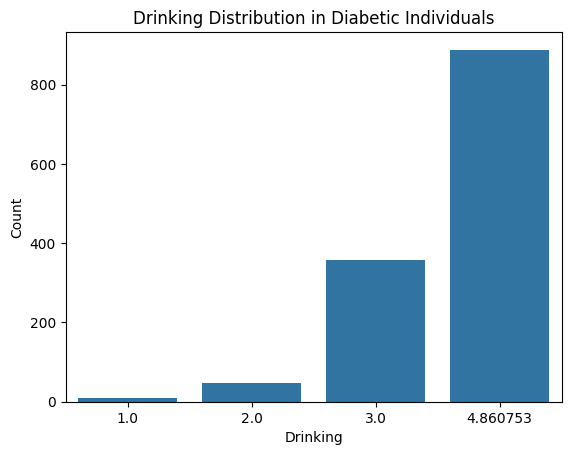

In [3]:
df = pd.read_csv('/content/diabetes.csv') # loading dataset
#df.head() #To view first five rows and columns
df.describe() #display information about the dataset


df.info()
# Check class balance
sns.countplot(x='Diabetes', data=df)
plt.title("Diabetes Class Distribution")

#using heatmaps
Y = df['Diabetes']
Y.value_counts()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#visualizing health metrics among diabetes patients
diabetic_df = df[df['Diabetes'] == 1]

non_binary_features = ['Age', 'BMI', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'SBP', 'DBP', 'ALT', 'BUN', 'CCR', 'FFPG']


for col in non_binary_features:
    sns.histplot(diabetic_df[col], kde=True)
    plt.title(f'{col} Distribution Among Diabetic Individuals')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#visualizing categorical features' distribution
sns.countplot(x=diabetic_df['Gender'])
plt.title("Gender Distribution in Diabetic Individuals")
plt.xlabel('Gender')
plt.ylabel("Count")
plt.show()

sns.countplot(x=diabetic_df['family_histroy'])
plt.title("Family history Distribution in Diabetic Individuals")
plt.xlabel('Family history')
plt.ylabel("Count")
plt.show()

df['smoking'] = df['smoking'].astype(int)
df['drinking'] = df['drinking'].astype(int)

sns.countplot(x=diabetic_df['smoking'])
plt.title("Smoking Distribution in Diabetic Individuals")
plt.xlabel('Smoking')
plt.ylabel("Count")
plt.show()

sns.countplot(x=diabetic_df['drinking'])
plt.title("Drinking Distribution in Diabetic Individuals")
plt.xlabel('Drinking')
plt.ylabel("Count")
plt.show()






In [ ]:
df.nunique()

,0
Age,70
Gender,2
BMI,275
SBP,111
DBP,75
FPG,361
Chol,486
Tri,478
HDL,188
LDL,384


In [ ]:
df['Diabetes'].value_counts()

,count
Diabetes,
0,3000
1,1303


**DATA EXPLORATION AND PRE PROCESSING**

**Let's split the data and train!!!**

In [17]:
categorical_columns = ['Gender', 'family_histroy', 'smoking', 'drinking']  # column names that are categorical

categorical_indices = [df.columns.get_loc(col) for col in categorical_columns]

X = df.drop(columns=['Diabetes'])
Y = df['Diabetes']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify= Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify= Y_train)


**Metrics**

**To do list**



*   Experiment with other models
*   Do a streamlit app
*   Write a report





In [ ]:
#DECISION TREE

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Accuracy: 0.9477503628447025
Validation Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       500
           1       0.90      0.92      0.91       189

    accuracy                           0.95       689
   macro avg       0.93      0.94      0.93       689
weighted avg       0.95      0.95      0.95       689

Test Accuracy: 0.9396051103368177
Test Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       624
           1       0.90      0.87      0.89       237

    accuracy                           0.94       861
   macro avg       0.93      0.92      0.92       861
weighted avg       0.94      0.94      0.94       861



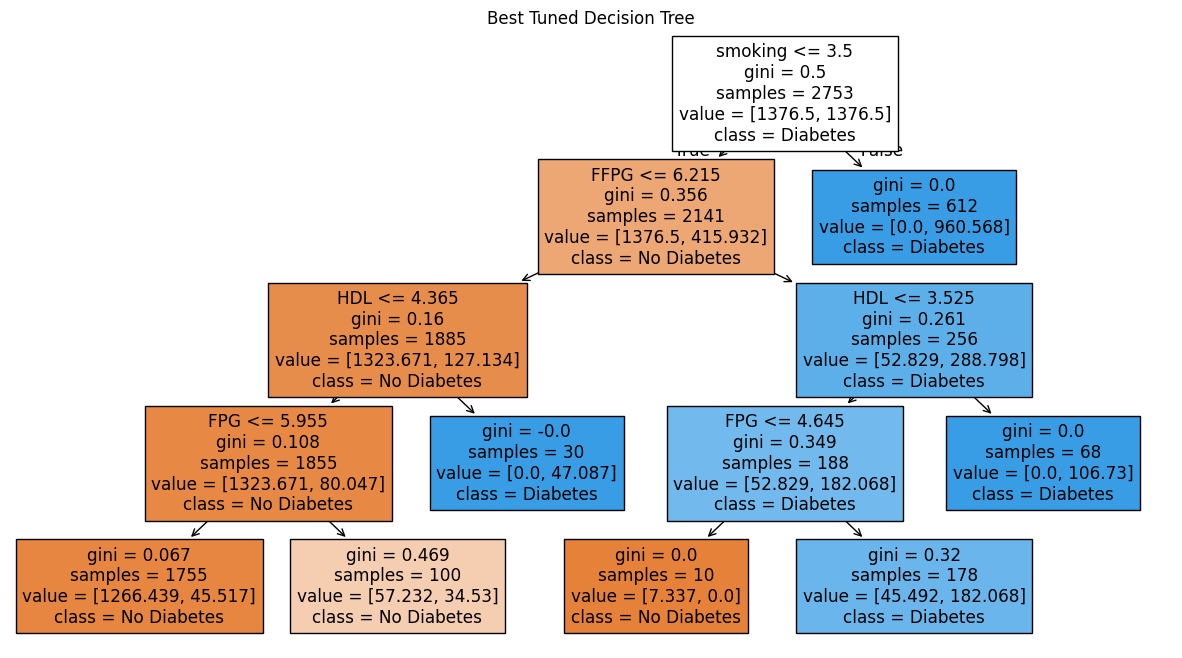

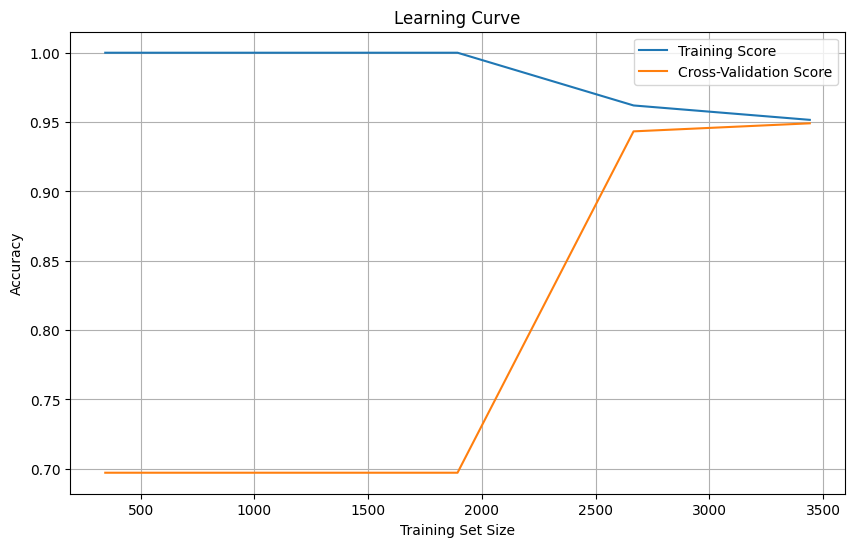


==== Summary ====
Training Score (CV Mean): 0.9827
Validation Score (Hold-out): 0.9478
Test Score (Final Evaluation): 0.9396


In [5]:
# === 1. Define Hyperparameter Grid ===
# These are the settings (hyperparameters) we want to try out during model tuning.
params = {
    'max_depth': [i for i in range(1,11)],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight = 'balanced'),
    param_grid=params,
    cv=10,                            # 10-fold cross-validation on training set
    scoring='accuracy'
)

grid.fit(X_train, Y_train)

# Get the Best Model from Grid Search
best_model = grid.best_estimator_   # This is the model with the best accuracy on training (via CV)

print("Best Parameters:", grid.best_params_)


# VALIDATION SECTION
# This is where we check how well the best model performs on the VALIDATION set
Y_val_pred = best_model.predict(X_val)
val_acc = accuracy_score(Y_val, Y_val_pred)

print("Validation Accuracy:", val_acc)
print("Validation Report:\n", classification_report(Y_val, Y_val_pred))


#  TEST SECTION
# Now we test our FINAL model on the TEST SET (completely unseen data)
# This gives us the real-world estimate of model performance.

Y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(Y_test, Y_test_pred)

print("Test Accuracy:", test_acc)
print("Test Report:\n", classification_report(Y_test, Y_test_pred))

# === 9. Visualize the Tree ===
plt.figure(figsize=(15, 8))
#No diabetes-blue, diabetes-orange
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Best Tuned Decision Tree")
plt.show()

# === 10. Plot Learning Curve using accuracy ===
train_sizes, train_scores, test_scores = learning_curve(best_model, X, Y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Summary of Accuracies ===
print("\n==== Summary ====")
print(f"Training Score (CV Mean): {np.mean(train_mean):.4f}")
print(f"Validation Score (Hold-out): {val_acc:.4f}")
print(f"Test Score (Final Evaluation): {test_acc:.4f}")

**Training and Evaluating the model using random forest**



In [6]:
from sklearn.ensemble import RandomForestClassifier

Validation Accuracy: 0.95355587808418
Validation Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       480
           1       0.91      0.94      0.92       209

    accuracy                           0.95       689
   macro avg       0.94      0.95      0.95       689
weighted avg       0.95      0.95      0.95       689

Validation Confusion Matrix:
[[460  20]
 [ 12 197]]


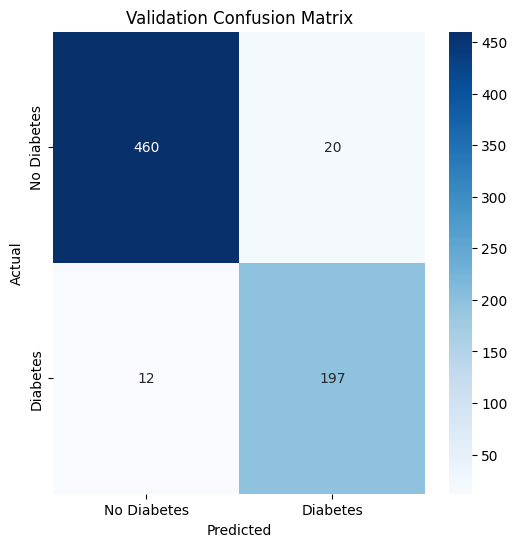

Test Accuracy: 0.9500580720092915
Test Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       600
           1       0.88      0.97      0.92       261

    accuracy                           0.95       861
   macro avg       0.93      0.95      0.94       861
weighted avg       0.95      0.95      0.95       861

Test Confusion Matrix:
[[566  34]
 [  9 252]]


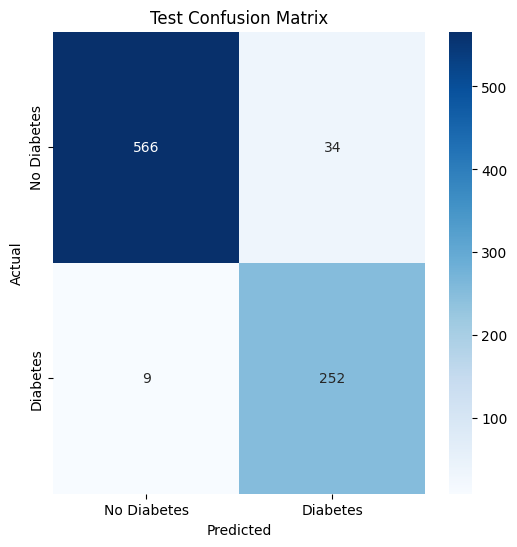

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np


# Use StratifiedKFold and ensure enough samples per class

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Define your parameter grid
params = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 1000],
    'max_depth': [i for i in range(1, 11)]

}

# GridSearchCV to tune hyperparameters
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=params,
    cv=cv,
    scoring='accuracy',
    error_score ='raise'  # <<< Raise errors immediately if something wrong
)

# Fit the grid search model on training data
grid.fit(X_train, Y_train)

# Get the best model from Grid Search
best_model = grid.best_estimator_   # This is the model with the best accuracy on training (via CV)

# --- Validation Section ---
# Get probability predictions for the positive class (diabetic = 1) for validation set
Y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Convert probabilities to class labels using a custom threshold
threshold = 0.3  # You can try 0.5, 0.4, etc. based on recall/F1 preference
Y_val_pred = (Y_val_proba >= threshold).astype(int)

# Calculate validation accuracy and report
val_acc = accuracy_score(Y_val, Y_val_pred)

print("Validation Accuracy:", val_acc)
print("Validation Report:\n", classification_report(Y_val, Y_val_pred))

# --- Confusion Matrix (Validation) ---
# For validation set
cm_val = confusion_matrix(Y_val, Y_val_pred)
print("Validation Confusion Matrix:")
print(cm_val)

# Plot confusion matrix for validation
plt.figure(figsize=(6, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Test Section ---
# Now we test our FINAL model on the TEST SET (completely unseen data)
# This gives us the real-world estimate of model performance.

# Get probability predictions for the positive class (diabetic = 1) for test set
Y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Convert probabilities to class labels using the same threshold
Y_test_pred = (Y_test_proba >= threshold).astype(int)

# Calculate test accuracy and classification report
test_acc = accuracy_score(Y_test, Y_test_pred)

print("Test Accuracy:", test_acc)
print("Test Report:\n", classification_report(Y_test, Y_test_pred))

# --- Confusion Matrix (Test) ---
# For test set
cm_test = confusion_matrix(Y_test, Y_test_pred)
print("Test Confusion Matrix:")
print(cm_test)

# Plot confusion matrix for test
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





In [23]:
# --- Learning Curve with Accuracy, F1-Score, and Recall ---
# Calculate learning curves for accuracy, F1-score, and recall using 5-fold cross-validation
f1_scorer = make_scorer(f1_score, zero_division=1)
recall_scorer = make_scorer(recall_score, zero_division=1)

train_sizes, train_scores_acc, test_scores_acc = learning_curve(best_model, X, Y, cv=5, scoring='accuracy')
train_sizes, train_scores_f1, test_scores_f1 = learning_curve(best_model, X, Y, cv=5, scoring= f1_scorer)
train_sizes, train_scores_recall, test_scores_recall = learning_curve(best_model, X, Y, cv=5, scoring= recall_scorer)

# Mean values for accuracy, F1-score, and Recall
train_mean_acc = np.mean(train_scores_acc, axis=1)
test_mean_acc = np.mean(test_scores_acc, axis=1)

train_mean_f1 = np.mean(train_scores_f1, axis=1)
test_mean_f1 = np.mean(test_scores_f1, axis=1)

train_mean_recall = np.mean(train_scores_recall, axis=1)
test_mean_recall = np.mean(test_scores_recall, axis=1)


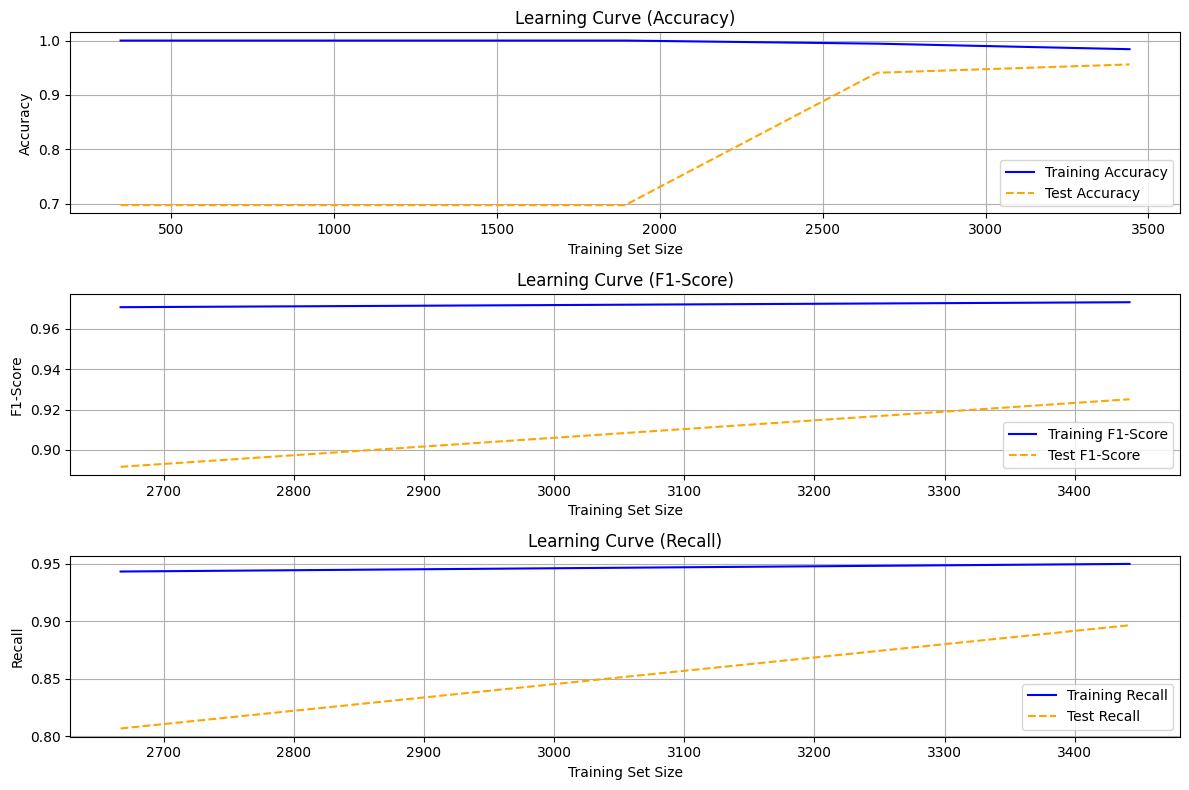


==== Summary ====
Training Score (CV Mean): 0.9957
Validation Score (Hold-out): 0.9536
Test Score (Final Evaluation): 0.9501


In [19]:
# Plot Learning Curves for Accuracy, F1-score, and Recall
plt.figure(figsize=(12, 8))

# Plot Accuracy Learning Curve
plt.subplot(3, 1, 1)
plt.plot(train_sizes, train_mean_acc, label="Training Accuracy", color='blue')
plt.plot(train_sizes, test_mean_acc, label="Test Accuracy", linestyle='--', color='orange')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Accuracy)")
plt.legend()
plt.grid(True)

# Plot F1-Score Learning Curve
plt.subplot(3, 1, 2)
plt.plot(train_sizes, train_mean_f1, label="Training F1-Score", color='blue')
plt.plot(train_sizes, test_mean_f1, label="Test F1-Score", linestyle='--', color='orange')
plt.xlabel("Training Set Size")
plt.ylabel("F1-Score")
plt.title("Learning Curve (F1-Score)")
plt.legend()
plt.grid(True)

# Plot Recall Learning Curve
plt.subplot(3, 1, 3)
plt.plot(train_sizes, train_mean_recall, label="Training Recall", color='blue')
plt.plot(train_sizes, test_mean_recall, label="Test Recall", linestyle='--', color='orange')
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.title("Learning Curve (Recall)")
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# --- Summary of Accuracies ---
print("\n==== Summary ====")
print(f"Training Score (CV Mean): {np.mean(train_mean_acc):.4f}")
print(f"Validation Score (Hold-out): {val_acc:.4f}")
print(f"Test Score (Final Evaluation): {test_acc:.4f}")

Using Balanced Random Forest

Validation Accuracy: 0.9521044992743106
Validation Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       480
           1       0.92      0.92      0.92       209

    accuracy                           0.95       689
   macro avg       0.94      0.94      0.94       689
weighted avg       0.95      0.95      0.95       689

Test Accuracy: 0.9558652729384437
Test Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       600
           1       0.91      0.95      0.93       261

    accuracy                           0.96       861
   macro avg       0.94      0.96      0.95       861
weighted avg       0.96      0.96      0.96       861



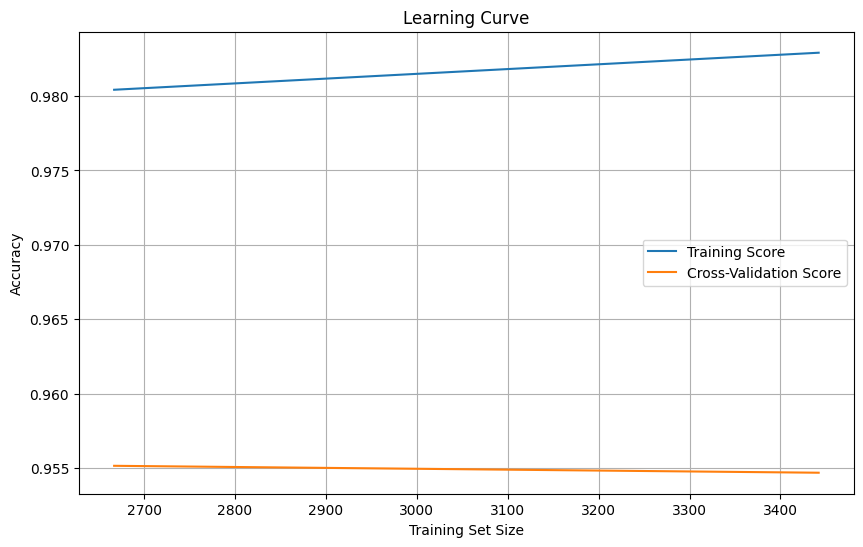


==== Summary ====
Training Score (CV Mean): nan
Validation Score (Hold-out): 0.9521
Test Score (Final Evaluation): 0.9559


In [25]:
from imblearn.ensemble import BalancedRandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify = Y_train)

params = {
     'n_estimators': [50, 100, 200, 300, 400, 500, 1000],
     'max_depth': [i for i in range(1,11)]
}

grid = GridSearchCV(
     estimator= BalancedRandomForestClassifier(random_state=42),
     param_grid=params,
    cv=10,                            # 5-fold cross-validation on training set
    scoring='accuracy'
)
grid.fit(X_train, Y_train)          # <<< MODEL IS TRAINED HERE (training set only)

# === 3. Get the Best Model from Grid Search ===
best_model = grid.best_estimator_   # This is the model with the best accuracy on training (via CV)

#print("Best Parameters:", grid.best_params_)


# === 4. VALIDATION SECTION ===
# This is where we check how well the best model performs on the VALIDATION set
Y_val_pred = best_model.predict(X_val)
val_acc = accuracy_score(Y_val, Y_val_pred)

print("Validation Accuracy:", val_acc)
print("Validation Report:\n", classification_report(Y_val, Y_val_pred))


# === 5. TEST SECTION ===
# Now we test our FINAL model on the TEST SET (completely unseen data)
# This gives us the real-world estimate of model performance.

Y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(Y_test, Y_test_pred)

print("Test Accuracy:", test_acc)
print("Test Report:\n", classification_report(Y_test, Y_test_pred))

# === 9. Visualize the Tree ===
# plt.figure(figsize=(15, 8))
# #No diabetes-blue, diabetes-orange
# plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
# plt.title("Best Tuned Decision Tree")
# plt.show()

# === 10. Plot Learning Curve ===
train_sizes, train_scores, test_scores = learning_curve(best_model, X, Y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Summary of Accuracies ===
print("\n==== Summary ====")
print(f"Training Score (CV Mean): {np.mean(train_mean):.4f}")
print(f"Validation Score (Hold-out): {val_acc:.4f}")
print(f"Test Score (Final Evaluation): {test_acc:.4f}")

USING SMOTE WITH RANDOM FOREST

In [ ]:
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, Y_resampled = smotenc.fit_resample(X_train, Y_train)

X_train, X_val, Y_train, Y_val = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42, stratify=Y_resampled)


params = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 1000],
    'max_depth': [i for i in range(1,11)]
}

grid = GridSearchCV(
    estimator= BalancedRandomForestClassifier(random_state=42),
    param_grid=params,
    cv=10,                            # 5-fold cross-validation on training set
    scoring='accuracy'
)

grid.fit(X_train, Y_train)          # <<< MODEL IS TRAINED HERE (training set only)

# === 3. Get the Best Model from Grid Search ===
best_model = grid.best_estimator_   # This is the model with the best accuracy on training (via CV)

#print("Best Parameters:", grid.best_params_)


# === 4. VALIDATION SECTION ===
# This is where we check how well the best model performs on the VALIDATION set
Y_val_pred = best_model.predict(X_val)
val_acc = accuracy_score(Y_val, Y_val_pred)

print("Validation Accuracy:", val_acc)
print("Validation Report:\n", classification_report(Y_val, Y_val_pred))


# === 5. TEST SECTION ===
# Now we test our FINAL model on the TEST SET (completely unseen data)
# This gives us the real-world estimate of model performance.

Y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(Y_test, Y_test_pred)

print("Test Accuracy:", test_acc)
print("Test Report:\n", classification_report(Y_test, Y_test_pred))

# === 9. Visualize the Tree ===
# plt.figure(figsize=(15, 8))
# #No diabetes-blue, diabetes-orange
# plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
# plt.title("Best Tuned Decision Tree")
# plt.show()

# === 10. Plot Learning Curve ===
train_sizes, train_scores, test_scores = learning_curve(best_model, X, Y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

# === 11. Summary of Accuracies ===
print("\n==== Summary ====")
print(f"Training Score (CV Mean): {np.mean(train_mean):.4f}")
print(f"Validation Score (Hold-out): {val_acc:.4f}")
print(f"Test Score (Final Evaluation): {test_acc:.4f}")